In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [3]:
#get ph shape file
ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_2.shp')
ph.head(5)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"POLYGON ((120.62710 17.49300, 120.62177 17.493..."
1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"POLYGON ((120.99042 17.39802, 120.98631 17.387..."
2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"POLYGON ((120.70788 17.45395, 120.70621 17.455..."
3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"POLYGON ((120.78956 17.41699, 120.78922 17.445..."
4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"POLYGON ((120.92917 17.41307, 120.92464 17.413..."


In [4]:
#join geo data
healthsite_join = gpd.sjoin(healthsites, ph, op="within")
healthsite_join.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470),679,PHL,Philippines,PHL.36_1,Iloilo,None,PHL.36.34_1,Pototan,None,None,Bayan|Munisipyo,Municipality,63037,PH.II.PT
402,4728751605,node,9.0,,pharmacy,,,,,46755569.0,,,,ffe71b2a26834d4ab2616a76febec871,,,,,,,1.0,,2017-03-11T06:06:43,,,,Far.sta.elena,,Mcarian,,,,,,,None,None,POINT (122.63367 10.94353),679,PHL,Philippines,PHL.36_1,Iloilo,None,PHL.36.34_1,Pototan,None,None,Bayan|Munisipyo,Municipality,63037,PH.II.PT
608,4543995433,node,9.0,,pharmacy,,,,,46755569.0,,,,918b01f6f8c74757b4a2bbe78f52b490,,,,,,,2.0,,2017-03-11T06:07:52,,,,RN phar,,Mcarian,,,,,,,None,None,POINT (122.63524 10.94884),679,PHL,Philippines,PHL.36_1,Iloilo,None,PHL.36.34_1,Pototan,None,None,Bayan|Munisipyo,Municipality,63037,PH.II.PT
1575,4728753594,node,9.0,,pharmacy,,,,,46755569.0,,,,fd6fefe77fe14f2fbff3bba695debea6,,,,,,,1.0,,2017-03-11T06:05:37,,,,Coolmer,,Mcarian,,,,,,,None,None,POINT (122.62966 10.92636),679,PHL,Philippines,PHL.36_1,Iloilo,None,PHL.36.34_1,Pototan,None,None,Bayan|Munisipyo,Municipality,63037,PH.II.PT
2080,247926194,way,15.0,,hospital,,Iloilo-Capiz (New Route),,,21490890.0,,,,ae9a3310c3224bae8d2d330d360cfc4e,,,,,,,2.0,yes,2014-04-04T09:06:07,,,,Iloilo Provincial Hospital,,maning,,,,,,,None,None,"POLYGON ((122.62866 10.92688, 122.62953 10.928...",679,PHL,Philippines,PHL.36_1,Iloilo,None,PHL.36.34_1,Pototan,None,None,Bayan|Munisipyo,Municipality,63037,PH.II.PT


In [5]:
#check cities
healthsite_join['NAME_1'].unique()

array(['Iloilo', 'Lanao del Norte', 'Cagayan', 'Metropolitan Manila',
       'Pangasinan', 'Bohol', 'Pampanga', 'Camarines Sur', 'Albay',
       'Laguna', 'Bulacan', 'Cebu', 'Bataan', 'Palawan', 'Leyte',
       'Negros Occidental', 'Southern Leyte', 'Sultan Kudarat',
       'Davao del Sur', 'Aklan', 'Nueva Ecija', 'Capiz', 'Cavite',
       'Samar', 'Quezon', 'Negros Oriental', 'Misamis Oriental',
       'Surigao del Norte', 'Rizal', 'Mountain Province', 'Benguet',
       'South Cotabato', 'Zamboanga del Sur', 'Agusan del Norte',
       'Camarines Norte', 'Ilocos Sur', 'Davao Oriental', 'Isabela',
       'Occidental Mindoro', 'Siquijor', 'Eastern Samar', 'Bukidnon',
       'Zambales', 'Camiguin', 'La Union', 'Northern Samar',
       'Ilocos Norte', 'Maguindanao', 'Batangas', 'Surigao del Sur',
       'Sorsogon', 'Misamis Occidental', 'Tarlac', 'Sarangani',
       'Dinagat Islands', 'Ifugao', 'Davao del Norte', 'North Cotabato',
       'Romblon', 'Masbate', 'Zamboanga Sibugay', 'Agusan d

In [6]:
#get healthsites from bulacan and pampanga
bul_pam_healthsites = healthsite_join[(healthsite_join['NAME_1'] == 'Bulacan') | (healthsite_join['NAME_1'] == 'Pampanga')]
bul_pam_healthsites.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
6,8076834059,node,28.0,,pharmacy,,Magsaysay,Edito Vitug,water_works,93459190.0,,,,d94f45a21f7c44d48b2702a6efd347f7,,,,survey,,,1.0,,2020-11-03T06:42:55,,,,We Care Drug,,KristeleH,,,,,pharmacy,private,None,None,POINT (120.56550 14.91256),1233,PHL,Philippines,PHL.60_1,Pampanga,None,PHL.60.8_1,Lubao,None,None,Bayan|Munisipyo,Municipality,35408,PH.PM.LB
91,8076429123,node,28.0,,clinic,,Jose Abad Santos Avenue,Dr. Maria Sheila I. Baesa-Sapuyot,water_works,93449004.0,,,,d1d82eff26144247ba6a1f79b6f7612d,,,,survey,,,1.0,,2020-11-03T03:36:56,,,,M.S. Baesa Medical Clinic,,KristeleH,,,,,clinic,private,None,None,POINT (120.56555 14.91268),1233,PHL,Philippines,PHL.60_1,Pampanga,None,PHL.60.8_1,Lubao,None,None,Bayan|Munisipyo,Municipality,35408,PH.PM.LB
105,290278622,way,25.0,,clinic,,,Annalisa Manalonzo,water_works,93454826.0,,,,f0bec4af851f4472bab783cd8b7082b8,,,,survey,,,4.0,,2020-11-03T05:35:37,,,,Santa Teresa 1st Barangay Health Station,,andreaverissa,,,,,midwife;clinic,barangay_government,None,None,"POLYGON ((120.55725 14.92661, 120.55725 14.926...",1233,PHL,Philippines,PHL.60_1,Pampanga,None,PHL.60.8_1,Lubao,None,None,Bayan|Munisipyo,Municipality,35408,PH.PM.LB
189,289873921,way,25.0,,clinic,,,Loida Mendiola,water_works,93454763.0,,,,ab46d43eaffb474ca5b95bdc62336e12,,,,survey,,,2.0,,2020-11-03T05:34:21,,,,Santa Rita Health Center II,,andreaverissa,,,,,midwife;clinic,barangay_government,None,None,"POLYGON ((120.53893 14.93892, 120.53896 14.938...",1233,PHL,Philippines,PHL.60_1,Pampanga,None,PHL.60.8_1,Lubao,None,None,Bayan|Munisipyo,Municipality,35408,PH.PM.LB
221,8027581265,node,18.0,,pharmacy,,,,,93843175.0,,,,e6853c21e4334a2394b983de35851462,,,,survey,,,2.0,,2020-11-10T07:56:44,,,,Yanra Pharmacy,,KristeleH,,,,,pharmacy,private,None,None,POINT (120.59993 14.93756),1233,PHL,Philippines,PHL.60_1,Pampanga,None,PHL.60.8_1,Lubao,None,None,Bayan|Munisipyo,Municipality,35408,PH.PM.LB


In [7]:
#get bulacan and pampanga shape
bul_pam_shape = ph[(ph['NAME_1'] == 'Bulacan') | (ph['NAME_1'] == 'Pampanga')] 

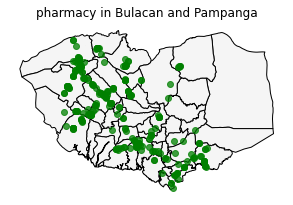

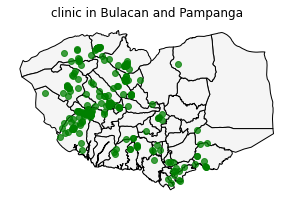

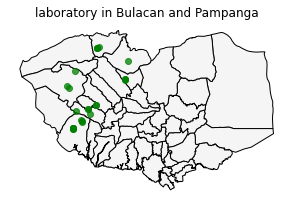

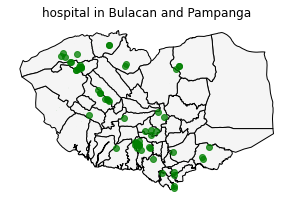

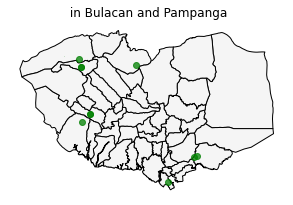

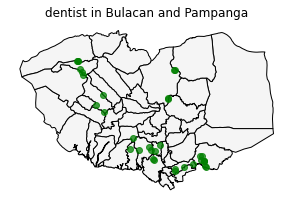

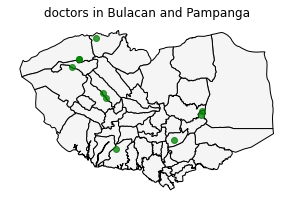

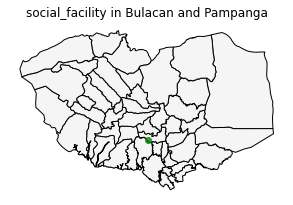

In [8]:
for amenity in bul_pam_healthsites['amenity'].unique():
  fig = plt.figure(figsize=(5, 5))
  ax = fig.add_subplot(111)
  bul_pam_shape.plot(ax=ax, color='whitesmoke', edgecolor='black')
  bul_pam_healthsites[bul_pam_healthsites['amenity'] == amenity].plot(ax=ax,  color='green', alpha=0.75)
  ax.axis('off')
  ax.set_title(amenity + ' in Bulacan and Pampanga' )